In [72]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# Trabajo final: 

### Airam Sampalo Berlanga
### Francisco Manuel de la Sierra Alcocer

# Ec. diferenciales asociadas a las órbitas de los planetas.

Las ley de la gravitación universal junto con las leyes de Newton, nos permiten entender como es la fuerza que actua sobre dos cuerpos afectados por la gravedad, y como esa fuerza afecta al movimiento. 

En nuestro trabajo nos centraremos en el sistema solar, y utilizaremos la Ley de la Gravitación Universal para crear un sistema de ecuaciones diferenciales que nos permita entender el movimiento y las órbitas de los planetas al rededor del Sol.

# 1) Desarrollo del sistema de ecuaciones diferenciales.

Sea:

$$M:= \textrm{\it{Masa del Sol}}$$
$$m:= \textrm{\it{Masa de un planeta}}$$
$$r:= \textrm{\it{Distancia entre el Sol y el planeta}}$$

El módulo de la fuerza que actúa sobre los dos cuerpos es:

$$ F = -G \cdot \dfrac{Mm}{r^{2}} $$

En nuestro caso asumiremos que el Sol está inmovil en el sistema, ya que al ser mucho más masivo, tal fuerza afectará mucho menos a su movimiento, haciéndolo despreciable. Así que estudiaremos solo la fuerza gravitatoria que ejerce el Sol sobre el planeta. Situaremos el origen de los ejes coordenados en el Sol, por lo que $r$ quedaría definido como:

$$ r = \sqrt{x^2 + y^2}$$

La fuerza que experimenta el planeta tiene sentido y dirección hacia el Sol.

Haciendo uso de la segunda Ley de Newton, llegamos a esta expresión de la aceleración:

$$ m \cdot a =  -G \cdot \dfrac{Mm}{r^{2}}$$
$$  a =  -G \cdot \dfrac{M}{r^{2}}$$

Si descomponemos la aceleración en sus dos componentes nos queda: 

$$  a_{x} =  -G \cdot \dfrac{M}{r^{2}} \cdot cos(\alpha)$$
$$  a_{y} =  -G \cdot \dfrac{M}{r^{2}} \cdot sen(\alpha)$$

Aplicando que: 

$$  x =  r \cdot cos(\alpha)$$
$$  y =  r \cdot sen(\alpha)$$

Llegamos a:

$$  a_{x} =  -G \cdot M \cdot \dfrac{x}{r^{3}}$$
$$  a_{y} =  -G \cdot M \cdot \dfrac{y}{r^{3}}$$

Teniendo en cuenta que la aceleración es la segunda derivada de la posición, llegamos al sistema de ecuaciones diferenciales de segundo orden siguiente:

$$ \begin{cases} x'' =  -G \cdot M \cdot \dfrac{x}{r^{3}} \\ y'' =  -G \cdot M \cdot \dfrac{y}{r^{3}} \end{cases} $$

Para poder aplicar el algoritmo de Runge-Kutta necesitamos un sistema de ecuaciones diferenciales de primer orden, por lo que obtendremos el siguiente sistema equivalente.

$$ \begin{cases} x' =  v_{x} \\ v_{x}' =  -G \cdot M \cdot \dfrac{x}{r^{3}} \\ y' =  v_{y} \\ v_{y}' = -G \cdot M \cdot \dfrac{y}{r^{3}} \end{cases}$$$$

Una vez obtenido nuestro sistema de ecuaciones de orden 1, podemos definir la función asociada al sistema:

In [73]:
G=6.672*(10**-11) #Constante de la gravitación universal
M=1.989*(10**30) #Masa del Sol

#Función asociada al sistema de ecuaciones diferenciales
def f(t,x,y,vx,vy):   
    return [vx, -(x*G*M)/(m.sqrt(x**2+y**2))**3, vy, -(y*G*M)/(np.sqrt(x**2+y**2))**3]

Y ahora definimos una función que aplique el algoritmo de Runge-Kutta:

In [74]:
def rk(f,p0,t):
    niter=len(t)-1
    h=t[1]-t[0]
    
    x=np.empty(niter+1)
    vx=np.empty(niter+1)
    y=np.empty(niter+1)
    vy=np.empty(niter+1)
    x[0]=p0[0]
    y[0]=p0[1]
    vx[0]=p0[2]
    vy[0]=p0[3]
    
    
    for n in range(niter):

        C1=f(t[n],x[n],y[n],vx[n],vy[n])
        
        k1=h*(C1[0])
        l1=h*(C1[1])
        q1=h*(C1[2])
        m1=h*(C1[3])

        C2=f(t[n]+h/2,x[n]+k1/2,y[n]+q1/2,vx[n]+l1/2,vy[n]+m1/2)
        k2=h*(C2[0])
        l2=h*(C2[1])
        q2=h*(C2[2])
        m2=h*(C2[3])

        C3=f(t[n]+h/2,x[n]+k2/2,y[n]+q2/2,vx[n]+l2/2,vy[n]+m2/2)
        k3=h*(C3[0])
        l3=h*(C3[1])
        q3=h*(C3[2])
        m3=h*(C3[3])

        C4=f(t[n]+h,x[n]+k3,y[n]+q3,vx[n]+l3,vy[n]+m3)
        k4=h*(C4[0])
        l4=h*(C4[1])
        q4=h*(C4[2])
        m4=h*(C4[3])
        
        x[n+1]=x[n]+1/6*(k1+2*k2+2*k3+k4)
        vx[n+1]=vx[n]+1/6*(l1+2*l2+2*l3+l4)
        y[n+1]=y[n]+1/6*(q1+2*q2+2*q3+q4)
        vy[n+1]=vy[n]+1/6*(m1+2*m2+2*m3+m4)
        
    return [x, y, vx, vy]

# 2) Aplicaciones y ejemplos de las soluciones del PVI planteado.


---------------------------
## Problema 1

Simular la orbita terrestre a partir de los siguientes datos:

    - Longitud del semieje mayor
	- Excentricidad
	- Argumento del periastro
$\newline$
A partir de estos datos podemos obtener una posición y velocidad inicial del planeta en su afelio.
1. Graficar el modulo de la velocidad y el modulo del vector posición
2. Estudiar la velocidad en el afelio y perihelio (ver que la velocidad en el perihelio es máxima)
3. Graficar theta(angulo del vector posición) y comprobar la duración de la órbita (365 días en el caso de la Tierra)

---------------------------

Ahora definiremos la función que calculará los valores iniciales a partir de la longitud del semieje mayor, la excentricidad y el argumento de periastro de un planeta que orbita al rededor del Sol, sopondremos que el movimiento es antihorario, que es el caso de todos los plantetas del sistema solar.

In [75]:
def estado_inicial(u, e, theta):
    """  
     u := Longitud del semieje mayor medido en unidades astronómicas (UA)
     e := Excentricidad de la órbita
     theta := Argumento del periastro

     A partir de las tres variables asociadas a un planeta, la función calcula los valores de posición y velocidad en su afelio,
     lo cual nos proporciona valores inicales para nuestro problema de valores iniciales.

     La función devuelve un vector que contiene:
     
     1-> x0: Componente x de la posición inicial
     2-> y0: Componente y de la posición inicial
     3-> v0_x: Componente x de la velocidad inicial
     4-> v0_y: Componente y de la velocidad inicial
    """    
    G=6.672*(10**-11) #Constante de la gravitación universal
    M=1.989*(10**30) #Masa del Sol
    
    sol = np.empty(4) #Creamos el vector que contendrá los cuatro valores iniciales (posición y velocidad)
    
    alpha = (theta - 180) * 2 * np.pi / 360 #Calculamos alpha, que será el argumento del apoastro o afelio
    a = u * 149597870700 #Longitud del semieje mayor medido en metros
    dist_afelio=a*(1+e) #Longitud del vector posición en el afelio
    v = np.sqrt(G * M / a * (1 - e) / (1 + e)) #Módulo del vector velocidad en su afelio
    
    sol[0] = np.cos(alpha)*dist_afelio #x0
    sol[1] = np.sin(alpha)*dist_afelio #y0
    sol[2] = v * np.cos(np.pi / 2 + alpha) #v0_x
    sol[3] = v * np.sin(np.pi / 2 + alpha) #v0_y
    return sol

### Aplicación del algoritmo al planeta Tierra

Conocemos los siguientes datos:
$$ a = 1 \textrm{\it{ UA}} $$
$$ \epsilon = 0.0167 $$
$$ \theta = 114.20783º$$

Luego podemos obtener los valores iniciales y aplicar Runge-Kutta para obtener las funciones de posición y velocidad del planeta Tierra:

In [76]:
u=1
epsilon=0.0167
theta=114.20783

estado_inicial_tierra = estado_inicial(u, epsilon, theta)

Tf_dias=365*2 # 2 años
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 10000)

t_dias=t/(24*3600)

mov_tierra = rk(f, estado_inicial_tierra, t)

### Órbita del Planeta Tierra

Para representar la órbita, graficaremos la función $x(t)$ e $y(t)$ en el plano:

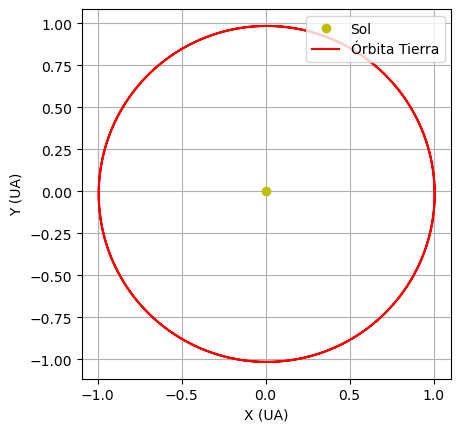

In [77]:
plt.grid()
plt.gca().set_aspect('equal')
plt.plot(0,0,'yo',label='Sol')
plt.plot(mov_tierra[0]/149597870700,mov_tierra[1]/149597870700,'-r',label="Órbita Tierra")
plt.xlabel('X (UA)')
plt.ylabel('Y (UA)') 
plt.legend(loc='upper right')

### Gráfica de las componentes de la posición

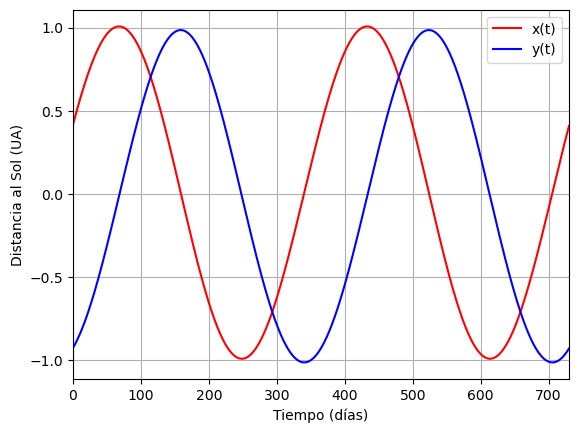

In [78]:
plt.grid()
plt.plot(t_dias,mov_tierra[0]/149597870700,'-r',label="x(t)")
plt.plot(t_dias,mov_tierra[1]/149597870700,'-b',label="y(t)")
plt.xlim(t_dias[0],t_dias[-1])
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=6)
plt.xlabel('Tiempo (días)')
plt.ylabel('Distancia al Sol (UA)') 
plt.legend(loc='upper right')

### Gráfica de las componentes de la velocidad

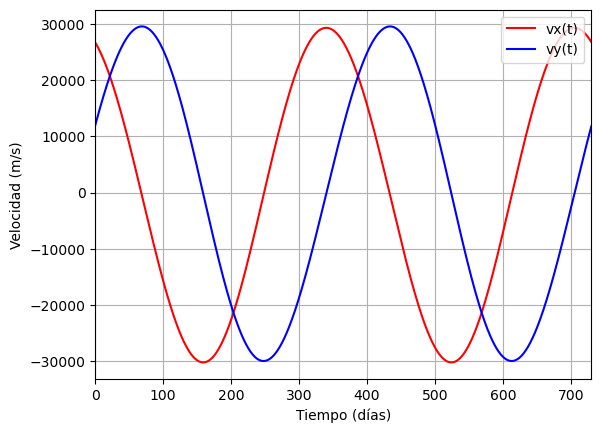

In [79]:
plt.grid()
plt.plot(t_dias,mov_tierra[2],'-r',label="vx(t)")
plt.plot(t_dias,mov_tierra[3],'-b',label="vy(t)")
plt.xlim(t_dias[0],t_dias[-1])
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=12)
plt.xlabel('Tiempo (días)')
plt.ylabel('Velocidad (m/s)') 
plt.legend(loc='upper right')

### Módulo del vector posición y velocidad

En las gráficas podemos observar que cuando el módulo de la posición es mínimo (perihelio), la velocidad es máxima, y que cuando el planeta Tierra se encuentra en su afelio, la velocidad es mínima. Esto entra en concordancia con las leyes de Kepler, ya que los planetas barren en sus órbitas áreas iguales en tiempos iguales.

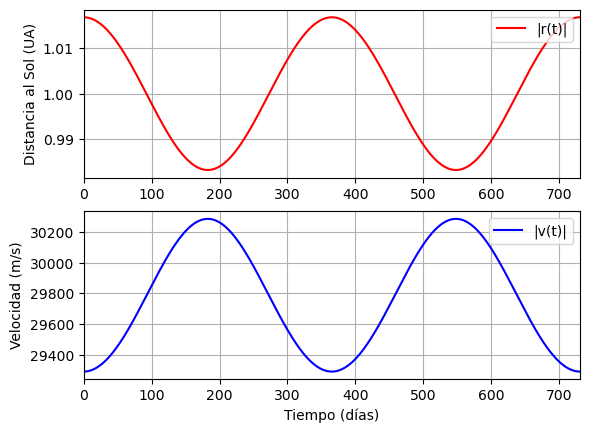

In [80]:
mod_r=np.sqrt((mov_tierra[0])**2+(mov_tierra[1])**2)/149597870700
mod_v=np.sqrt((mov_tierra[2])**2+(mov_tierra[3])**2)

plt.subplot(211)
plt.grid()
plt.plot(t_dias,mod_r,'-r',label="|r(t)|")
plt.xlim(t_dias[0],t_dias[-1])
plt.locator_params(axis='y', nbins=6)
plt.ylabel('Distancia al Sol (UA)') 
plt.legend(loc='upper right')

plt.subplot(212)
plt.grid()
plt.plot(t_dias,mod_v,'-b',label="|v(t)|")
plt.xlim(t_dias[0],t_dias[-1])
plt.xlabel('Tiempo (días)') 
plt.ylabel('Velocidad (m/s)') 
plt.legend(loc='upper right')

### Ángulo

Graficaremos el ángulo del planeta Tierra durante su trayectora, veremos que se recorren $2\pi$ radianes (1 vuelta completa) en 365 días.

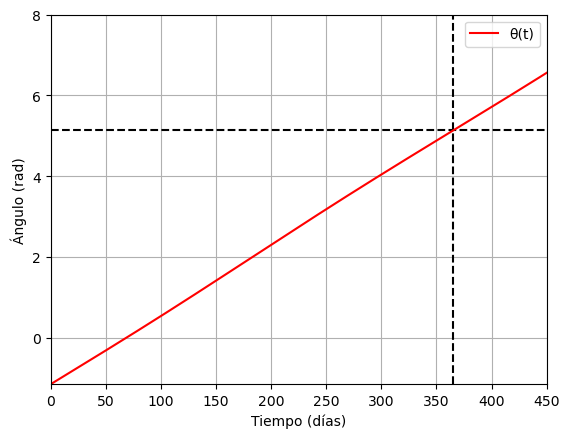

In [81]:
#Calculamos el número de datos t creamos un vector vacío para calcular el ángulo de traslación que lleva la Tierra en cada instante:
n=len(mov_tierra[0])
theta_tierra=np.empty(n)

#Calculamos el ángulo.
for i in range(0,n):
    theta_tierra[i]=m.atan2(mov_tierra[1][i],mov_tierra[0][i])

#Ajustamos para que el ángulo no salte de pi a -pi, y sea una función constante.
for i in range(0,n-1):
    if theta_tierra[i]>theta_tierra[i+1]:
        theta_tierra[i+1:]=theta_tierra[i+1:]+2*np.pi


#Graficamos el ángulo en función del tiempo
plt.grid()
plt.axhline(y=theta_tierra[0]+2*np.pi, color='k', linestyle='dashed')
plt.axvline(x=365, color='k', linestyle='dashed')
plt.plot(t_dias,theta_tierra,'-r',label="θ(t)")
plt.xlim(0,450)
plt.ylim(theta_tierra[0],8)
plt.xlabel('Tiempo (días)') 
plt.ylabel('Ángulo (rad)') 
plt.legend(loc='upper right')

--------------------------------

## Problema 2

Representrar el sistema solar (Sol y planetas) con los siguientes datos:

    - Longitud del semieje mayor
    
    - Excentricidad
    
    - Argumento del periastro

--------------------------------  

### Sistema Solar Interior

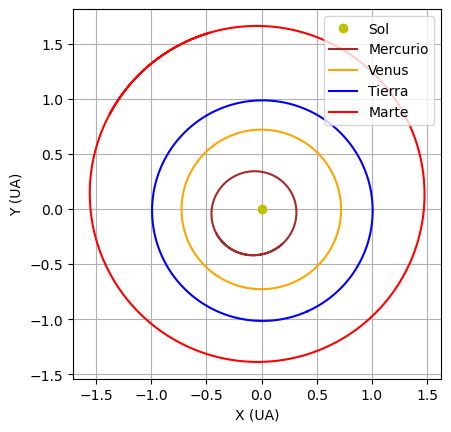

In [82]:
# Mercurio
u=0.387098
epsilon=0.20563069
theta=29.124

estado_inicial_mercurio = estado_inicial(u, epsilon, theta)
Tf_dias=115.88  # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 100000)

mov_mercurio = rk(f, estado_inicial_mercurio, t)

# Venus
u=0.723327
epsilon=0.00677323
theta=55.186

estado_inicial_venus = estado_inicial(u, epsilon, theta)

# Venus
u=0.723327
epsilon=0.00677323
theta=55.186

estado_inicial_venus = estado_inicial(u, epsilon, theta)

Tf_dias= 224.701  # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 100000)

mov_venus = rk(f, estado_inicial_venus, t)

# Tierra
u=1.00000261
epsilon=0.01671123
theta=114.20783

estado_inicial_tierra = estado_inicial(u, epsilon, theta)

Tf_dias= 365.256363004  # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 100000)

mov_tierra = rk(f, estado_inicial_tierra, t)

# Marte
u=1.523679
epsilon=0.093315
theta=286.537

estado_inicial_marte = estado_inicial(u, epsilon, theta)

Tf_dias=779.96 # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 100000)

mov_marte = rk(f, estado_inicial_marte, t)

plt.grid()
plt.gca().set_aspect('equal')
plt.plot(0,0,'yo',label='Sol')
plt.plot(mov_mercurio[0]/149597870700,mov_mercurio[1]/149597870700, label="Mercurio", c = 'brown')
plt.plot(mov_venus[0]/149597870700,mov_venus[1]/149597870700, label="Venus", c = 'orange')
plt.plot(mov_tierra[0]/149597870700,mov_tierra[1]/149597870700, label="Tierra", c = 'blue')
plt.plot(mov_marte[0]/149597870700,mov_marte[1]/149597870700, label="Marte", c = 'red')
plt.xlabel('X (UA)')
plt.ylabel('Y (UA)') 
plt.legend(loc='upper right')

### Sistema Solar Exterior

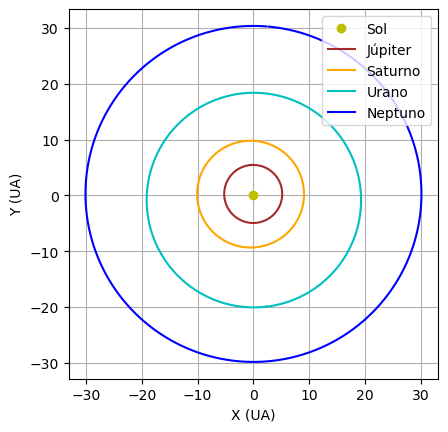

In [83]:
# Júpiter
u=5.204267
epsilon=0.0487749764
theta=275.066

estado_inicial_jupiter = estado_inicial(u, epsilon, theta)

Tf_dias=11*365 + 315 + 1.1/24 # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 100000)

mov_jupiter = rk(f, estado_inicial_jupiter, t)

# Saturno
u=9.5820172
epsilon=0.05648
theta=336.013862

estado_inicial_saturno = estado_inicial(u, epsilon, theta)

Tf_dias=29*365 + 167.25 # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 100000)

mov_saturno = rk(f, estado_inicial_saturno, t)

# Urano
u=19.22941195
epsilon=0.044405586
theta=96.541318

estado_inicial_urano = estado_inicial(u, epsilon, theta)

Tf_dias=30799.095  # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 100000)

mov_urano = rk(f, estado_inicial_urano, t)

# Neptuno
u=30.10366151
epsilon=0.00858587
theta=265.646853

estado_inicial_neptuno = estado_inicial(u, epsilon, theta)

Tf_dias=60190  # 1 año
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 100000)

mov_neptuno = rk(f, estado_inicial_neptuno, t)

plt.grid()
plt.plot(0,0,'yo',label='Sol')
plt.gca().set_aspect('equal')
plt.plot(mov_jupiter[0]/149597870700,mov_jupiter[1]/149597870700, label="Júpiter", c = 'brown')
plt.plot(mov_saturno[0]/149597870700,mov_saturno[1]/149597870700, label="Saturno", c = 'orange')
plt.plot(mov_urano[0]/149597870700,mov_urano[1]/149597870700, label="Urano", c = 'c')
plt.plot(mov_neptuno[0]/149597870700,mov_neptuno[1]/149597870700, label="Neptuno", c = 'blue')
plt.xlabel('X (UA)')
plt.ylabel('Y (UA)') 
plt.legend(loc='upper right')

--------------------------------

## Problema 3

Buscar posiciones y velocidades iniciales para órbitas de distintos tipos (distintas cónicas).

--------------------------------

In [84]:
def orbitas_excentricidad(e):
    
#Calcularemos los valores iniciales para el perihelio.
    
    rp=1*149597870700 #Partimos de un módulo de la posición inicial arbitraria (1 UA)
    if e==1:
        v=np.sqrt(G*M*(2/rp)) #Cálculamos el módulo de la velocidad inicial para cuando epsilon=1 (órbita parabólica).
    else:
        a=rp/(1-e)
        v=np.sqrt(G*M*(2/rp-1/a)) #Cálculamos el módulo de la velocidad inicial para cualquier otro caso.
    


    Tf_dias=365*4 # 75 años
    Tf=Tf_dias*24*3600
    t = np.linspace(0, Tf, 10000)
    mov=rk(f,[rp,0,0,v],t) # Hacemos que el movimiento parta desde el eje x, por lo que la "componente y" de la posición sera 0.
    # Como en el perihelio la velocidad es perpendicular a vector posición, la "componente x" de la velocidad será 0.

    # Como solo obtendríamos una semiórbita, que parte del eje x, por simetría calculammos unos nuevos valores iniciales.
    x=mov[0][-1]
    y=-(mov[1][-1])
    vx=-(mov[2][-1])
    vy=mov[3][-1]

    Tf=Tf*2
    t = np.linspace(0, Tf, 10000)
    mov2=rk(f,[x,y,vx,vy],t) #Obtenemos la órbita final, que será simétrica respecto al eje X.
    
    return mov2

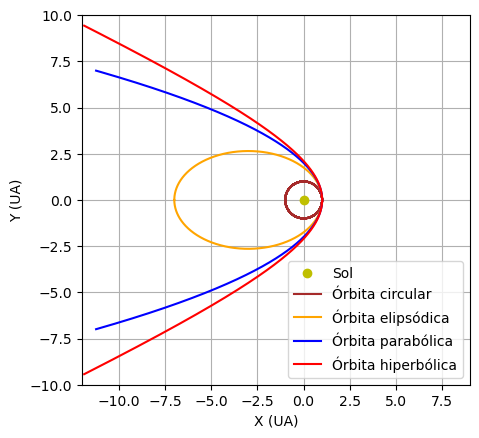

In [85]:
#Obtenemos una órbita para cada tipo de cónica.
e1=orbitas_excentricidad(0) # Circular
e2=orbitas_excentricidad(0.75) # Elipsódica
e3=orbitas_excentricidad(1) # Parabólica
e4=orbitas_excentricidad(1.1) # Hiperbólica

#Graficamos las distintas órbitas.
plt.grid()
plt.gca().set_aspect('equal')
plt.plot(0,0,'yo',label='Sol')
plt.plot(e1[0]/149597870700,e1[1]/149597870700,'-',label="Órbita circular",c = 'brown')
plt.plot(e2[0]/149597870700,e2[1]/149597870700,'-',label="Órbita elipsódica",c = 'orange')
plt.plot(e3[0]/149597870700,e3[1]/149597870700,'-',label="Órbita parabólica",c = 'blue')
plt.plot(e4[0]/149597870700,e4[1]/149597870700,'-',label="Órbita hiperbólica",c = 'red')
plt.xlim(-12,9)
plt.ylim(-10,10)
plt.xlabel('X (UA)')
plt.ylabel('Y (UA)') 
plt.legend(loc='lower right')

---

## Problema 4

Intentar representar la órbita del cometa Halley desde la última vez que fue visible y deducir cuando volverá a serlo.

---

### Órbita del Cometa Halley

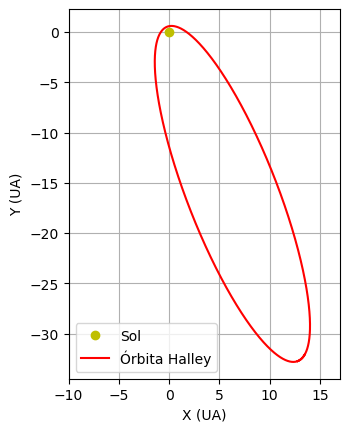

In [86]:
u=17.857619
epsilon=0.967990
theta=111.33249

estado_inicial_halley = estado_inicial(u, epsilon, theta)

Tf_dias=365*80 # 80 años
Tf=Tf_dias*24*3600
t = np.linspace(0, Tf, 10000)
t_dias=t/(24*3600)

mov_halley = rk(f, estado_inicial_halley, t)

plt.grid()
plt.xlim(-10,17) 
plt.gca().set_aspect('equal')
plt.plot(0,0,'yo',label='Sol')
plt.plot(mov_halley[0]/149597870700,mov_halley[1]/149597870700,'-r',label="Órbita Halley")
plt.xlabel('X (UA)')
plt.ylabel('Y (UA)') 
plt.legend(loc='lower left')

### Cálculo del periodo orbital

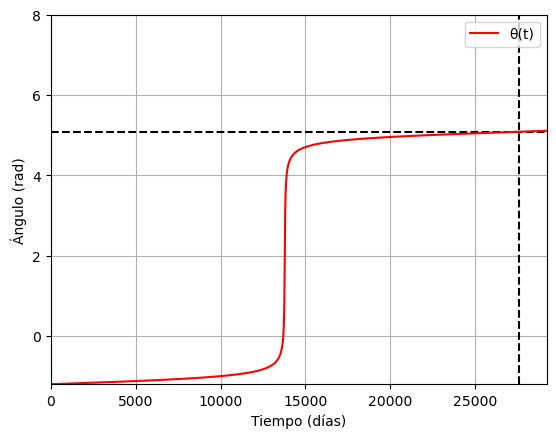

In [87]:
#Calculamos el número de datos t creamos un vector vacío para calcular el ángulo de traslación que lleva la Tierra en cada instante:
n=len(mov_halley[0])
theta_halley=np.empty(n)

#Calculamos el ángulo.
for i in range(0,n):
    theta_halley[i]=m.atan2(mov_halley[1][i],mov_halley[0][i])

#Ajustamos para que el ángulo no salte de pi a -pi, y sea una función constante.
for i in range(0,n-1):
    if theta_halley[i]>theta_halley[i+1]:
        theta_halley[i+1:]=theta_halley[i+1:]+2*np.pi

#Calculemos en que instante se llega a los 2pi radianes.
for i in range(0,n):
    if theta_halley[i]>=theta_halley[0]+2*np.pi:
        T=t_dias[i]/365 #Periodo orbital
        break


#Graficamos el ángulo en función del tiempo
plt.grid()
plt.axhline(y=theta_halley[0]+2*np.pi, color='k', linestyle='dashed')
plt.axvline(x=365*T, color='k', linestyle='dashed')
plt.plot(t_dias,theta_halley,'-r',label="θ(t)")
plt.xlim(0,365*80)
plt.ylim(theta_halley[0],8)
plt.xlabel('Tiempo (días)') 
plt.ylabel('Ángulo (rad)') 
plt.legend(loc='upper right')

### Cálculo de nuestra predicción

In [88]:
# Hemos caculado el periodo y sabemos que la última vez que fue visible fue el 9 de febrero de 1986.
# Calculamos los días trascurridos desde el 01/01/0001 hasta que la fecha el la que vuelve a ser visible.
a=1986
dias=(365*a + m.trunc(a/4) - m.trunc(a/100) + m.trunc(a/400))+(9+31) #Tenemos en cuenta los años bisiestos y sumamos los días del año 1986
dias=dias+T*365 #Sumamos el período para obtener nuestra predicción en días.

# Calculamos el año en el que volverá a ser visible. Sale como resultado el año 2061.
a=m.trunc(dias/365.24)

# Calculamos los días trascurridos desde el año de la predicción hasta la fecha de la predicción.
dias2=(365*a + m.trunc(a/4) - m.trunc(a/100) + m.trunc(a/400))
m.trunc(dias-dias2)

print("Año:", a)
print("Días:", m.trunc(dias-dias2))

# El día 210 se corresponde con el día 29 de Julio. Luego nuestra predicción es que volverá a ser visible el día 29 de Julio de 2061.

Año: 2061
Días: 210


**Nuestra predicción:** 29 de Julio de 2061 

**Wikipedia:** 28 de Julio de 2061 

Habrá que estar ahí para comprobarlo.
## ☺

